In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
df21=pd.read_csv('/content/drive/MyDrive/Proyecto final/Cierre_agr_mun_2021.csv',index_col=0, encoding='latin-1')
df20=pd.read_csv('/content/drive/MyDrive/Proyecto final/Cierre_agricola_mun_2020.csv',index_col=0, encoding='latin-1')
df19=pd.read_csv('/content/drive/MyDrive/Proyecto final/Cierre_agricola_mun_2019.csv',index_col=0, encoding='latin-1')
df18=pd.read_csv('/content/drive/MyDrive/Proyecto final/Cierre_agricola_mun_2018.csv',index_col=0, encoding='latin-1')
df17=pd.read_csv('/content/drive/MyDrive/Proyecto final/Cierre_agricola_mun_2017.csv',index_col=0, encoding='latin-1')
df16=pd.read_csv('/content/drive/MyDrive/Proyecto final/Cierre_agricola_mun_2016.csv',index_col=0, encoding='latin-1')
df15=pd.read_csv('/content/drive/MyDrive/Proyecto final/Cierre_agricola_mun_2015.csv',index_col=0, encoding='latin-1')

In [ ]:
hort=['Acelga','Ajo','Apio','berenjena','calabaza','cebolla','cebolleta','coliflor','cebollino',
      'Champiñon','Espinacas','Lechuga','Papa','Haba','Pepino','Pimiento morrón','Puerro','Rábano',
      'Remolacha','Repollo','Setas','Tomate','Zanahoria','Menta','Romero','Hierbabuena','Albahaca','Fresa']

In [ ]:
print(df21.columns)
print(df20.columns)
print(df19.columns)
print(df18.columns)
print(df17.columns)
print(df16.columns)
print(df15.columns)

In [ ]:
df=pd.concat([df21,df20,df19,df18,df17,df16,df15])
df=df.reset_index()


In [ ]:
df.tail(5)

In [ ]:
df.dtypes 

In [ ]:
df['Sembrada']=df['Sembrada'].astype('float64')

In [ ]:
df.columns

In [ ]:
df=df.rename(columns={'Nomestado':'Estado','Nomcicloproductivo':'Ciclo','Nommodalidad':'Modalidad','Nomunidad':'Unidad','Volmenproduccion':'Volproduccion', 'Nomcultivo Sin Um':'Nomcultivo'})
df.tail()

In [ ]:
df.isna().sum()

In [ ]:
estados=list(df['Estado'].unique())
estados

Selección de columnas de interés.

In [ ]:
df2=df[['Estado','Nomcultivo', 'Sembrada', 'Cosechada', 'Siniestrada', 'Volumenproduccion']]
df2.head()

Agrupación para encontrar la producción total de hortalizas por estado en los últimos años.

In [ ]:
group=df2.groupby(['Estado','Nomcultivo']).sum()
group=group.reset_index(drop=False)
group

In [ ]:
group=group.loc[group['Nomcultivo'].apply(lambda x:x in hort)]

In [ ]:
group['Nomcultivo'].unique()

Estimados de locación

In [ ]:
print('Media:',group['Cosechada'].mean())
print('Mediana:',group['Cosechada'].median())
print('Media truncada:',stats.trim_mean(group['Cosechada'], 0.1))
print('Desviación:',group['Cosechada'].std())
print('Mínimo:', group['Cosechada'].min())
print('Máximo:',group['Cosechada'].max())

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=group['Cosechada'])

In [ ]:
sns.distplot(group['Cosechada'], kde=False, norm_hist=False, bins=10)

Gráfica de cultivos con mayor producción a nivel nacional.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Acelga'),
  Text(1, 0, 'Ajo'),
  Text(2, 0, 'Apio'),
  Text(3, 0, 'Fresa'),
  Text(4, 0, 'Lechuga'),
  Text(5, 0, 'Pepino'),
  Text(6, 0, 'Rábano'),
  Text(7, 0, 'Zanahoria'),
  Text(8, 0, 'Albahaca'),
  Text(9, 0, 'Menta'),
  Text(10, 0, 'Papa'),
  Text(11, 0, 'Romero'),
  Text(12, 0, 'Hierbabuena')])

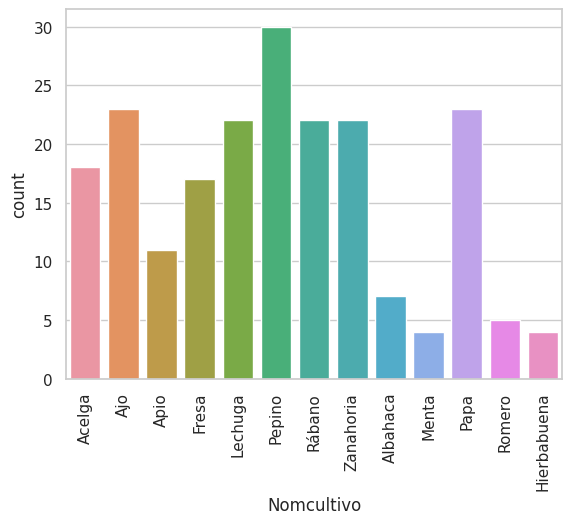

In [ ]:
sns.countplot(group,x='Nomcultivo')
sns.set_style('whitegrid')
plt.xticks(rotation=90)

In [ ]:
fig=px.treemap(group,path=['Estado','Nomcultivo'],values='Cosechada', height= 1500, width=1200)
fig.data[0].textinfo='label+value'
fig.update_traces(root_color="lightgrey")

fig.layout.hovermode= False
fig.show()

Modelo 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
tomato=pd.read_csv('/content/drive/MyDrive/Proyecto final/Tomato.csv', index_col=0)
tomato= tomato.reset_index(drop=False)
tomato.head()

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato


In [ ]:
tomato['Date']=pd.to_datetime(tomato['Date'])

In [ ]:
tomato['year']=tomato['Date'].dt.year
tomato['month']=tomato['Date'].dt.month
tomato['day']=tomato['Date'].dt.day
tomato.head()

In [ ]:
dftom=tomato[['year','month','day','Average']]
dftom.head()

,year,month,day,Average
0,2013,6,16,29.0
1,2013,6,17,22.5
2,2013,6,18,24.0
3,2013,6,19,26.0
4,2013,6,20,24.0


In [ ]:
X=dftom.drop('Average',axis=1)
y=dftom['Average']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

In [ ]:
modelo=LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

In [ ]:
prediccion=modelo.predict(X_test)


In [ ]:
len(prediccion)

In [ ]:
len(y_test)

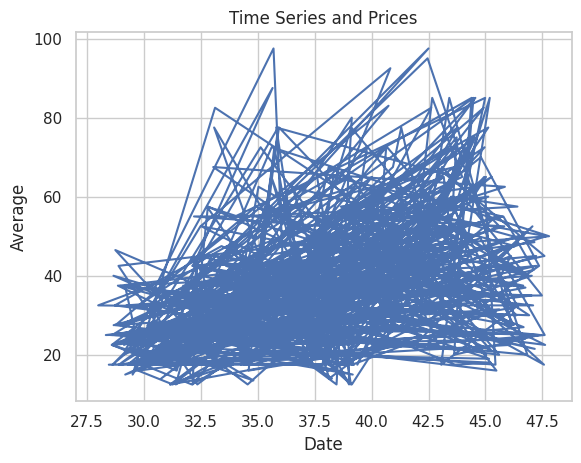

In [ ]:
plt.plot()
plt.plot(prediccion, y_test, label='Variable 2')
plt.xlabel('Date')
plt.ylabel('Average')
plt.title('Time Series and Prices')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, prediccion)
r2 = r2_score(y_test, prediccion)

print(mse)
print(r2)